**SHREASI SEN 20BCE2738**

Al Assignment 3

Build a CNN model for Bird species

Bird species classification is the process of using machine learning and computer vision techniques to identify and categorize different species of birds based on their visual characteristics. By analyzing images of birds, models can extract features and patterns to accurately classify bird species. This classification is vital for ecological research, wildlife monitoring, and conservation efforts. Advancements in deep learning and the availability of large annotated datasets have improved the accuracy of bird species classification models. Challenges include variations in lighting, pose, and background clutter. Ongoing research focuses on methods like transfer learning and data augmentation to enhance classification performance and contribute to avian biodiversity understanding and conservation.

Dataset Link: https://www.kaggle.com/datasets/akash2907/bird-species-classification

In [ ]:
!unzip '/content/drive/MyDrive/birds.zip'

Archive:  /content/drive/MyDrive/birds.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_4588.jpg  
  inflating: test_data

In [ ]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))  #--> (0 to 255) convert t

In [ ]:
train = train_gen.flow_from_directory('/content/train_data',
                                      target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)
test = test_gen.flow_from_directory('/content/test_data',
                                    target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)

Found 150 images belonging to 1 classes.
Found 157 images belonging to 1 classes.


In [ ]:
train.class_indices

{'train_data': 0}

In [ ]:
# CNN
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
19/19 [==============================] - 74s 4s/step - loss: 52.9554 - accuracy: 0.0400 - val_loss: 171.0551 - val_accuracy: 0.0000e+00
Epoch 2/10
19/19 [==============================] - 69s 4s/step - loss: 602.3558 - accuracy: 0.0000e+00 - val_loss: 1363.7596 - val_accuracy: 0.0000e+00
Epoch 3/10
19/19 [==============================] - 71s 4s/step - loss: 2453.6865 - accuracy: 0.0000e+00 - val_loss: 4035.2664 - val_accuracy: 0.0000e+00
Epoch 4/10
19/19 [==============================] - 71s 4s/step - loss: 6078.2070 - accuracy: 0.0000e+00 - val_loss: 8728.2432 - val_accuracy: 0.0000e+00
Epoch 5/10
19/19 [==============================] - 69s 4s/step - loss: 11339.9541 - accuracy: 0.0000e+00 - val_loss: 15100.6182 - val_accuracy: 0.0000e+00
Epoch 6/10
19/19 [==============================] - 71s 4s/step - loss: 18398.3906 - accuracy: 0.0000e+00 - val_loss: 23005.1172 - val_accuracy: 0.0000e+00
Epoch 7/10
19/19 [==============================] - 74s 4s/step - loss: 26565.55

In [ ]:
model.save('birdSpecies.h5')

In [ ]:
# Testing
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
img = image.load_img('/content/test_data/test_data/rebimg/100_5756.JPG',target_size=(120,120))

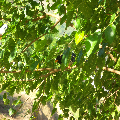

In [ ]:
img

In [ ]:
img = image.img_to_array(img)
img

array([[[ 81., 115.,   5.],
        [ 80., 128.,   0.],
        [ 68., 131.,   0.],
        ...,
        [150., 143.,  75.],
        [245., 239., 203.],
        [ 68.,  82.,  33.]],

       [[102., 153.,   0.],
        [117., 166.,   0.],
        [111., 156.,  29.],
        ...,
        [ 45.,  63.,  15.],
        [ 43.,  56.,  12.],
        [ 40.,  51.,   8.]],

       [[ 66., 100.,   6.],
        [ 55.,  83.,   0.],
        [ 84., 122.,  21.],
        ...,
        [ 73.,  60.,  15.],
        [ 52.,  72.,   1.],
        [ 53.,  64.,   8.]],

       ...,

       [[238., 199., 142.],
        [180., 149.,  85.],
        [218., 190., 117.],
        ...,
        [ 81.,  96.,  13.],
        [ 85.,  98.,  29.],
        [255., 251., 202.]],

       [[236., 200., 140.],
        [233., 198., 134.],
        [187., 181.,  97.],
        ...,
        [101., 118.,  22.],
        [ 95.,  99.,  40.],
        [248., 237., 173.]],

       [[172., 158.,  85.],
        [210., 171., 114.],
        [239., 2

In [ ]:
import tensorflow.keras as keras

In [ ]:
np.argmax(model.fit(img))